# Modeling Driven RLC Circuit with Experimental Data and Computational Mode

In [5]:
# Import Libraries
import pandas as pd
import math
import numpy as np
from Unit0 import model_utils
import statistics

In [6]:
# Constants
resistance = [45.7, 60.4]
inductance = 0.02421893575
capacitance = [0.00001, 0.000001]
voltage = [5, 10]
frequency_initial = 0
frequency_final = 2000

In [7]:
def compute_models(resistance, inductance, capacitance, voltage):
    def compute_model(frequency):
        angular_frequency = 2 * math.pi * frequency

        def compute_acceleration(t, current, current_prime, _current_double_prime):
            return voltage * angular_frequency * math.cos(angular_frequency * t) / inductance - resistance / inductance * current_prime - current / (inductance * capacitance)

        times = np.linspace(0, 0.1, 10001)
        _, current, _, _ = model_utils.euler_method(compute_acceleration, times=times)

        # Calculate the amplitude by checking the max value in the last five seconds
        return max(current[-5000:])

    frequencies = np.linspace(frequency_initial, frequency_final, 101)
    amplitudes = list(map(compute_model, frequencies))

    # Graph frequency vs amplitude
    model_utils.graph([(frequencies, amplitudes, "Computational")], "Amplitude", "A", "Frequency", "Hz", f"{resistance}Ω {inductance}H {capacitance}F {voltage}V", f"Graphs/ResponseCurve_{resistance}Ω_{inductance}H_{capacitance}F_{voltage}V")

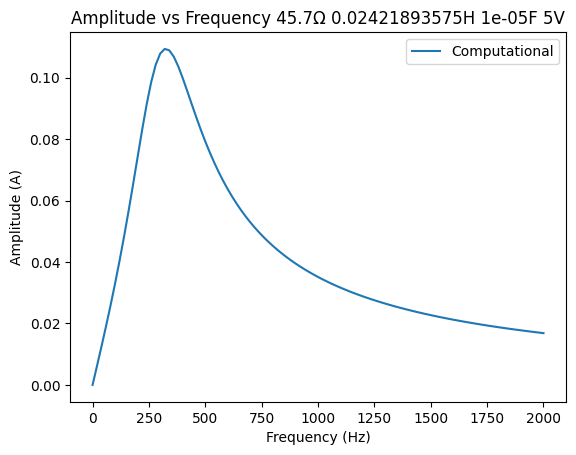

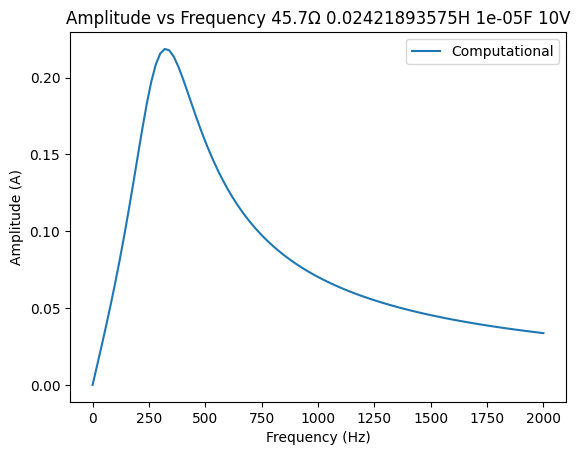

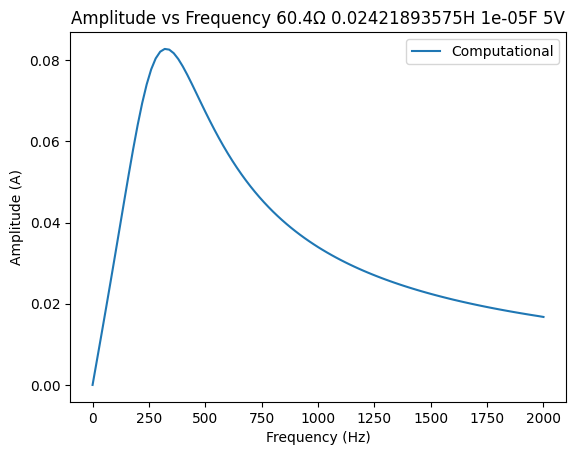

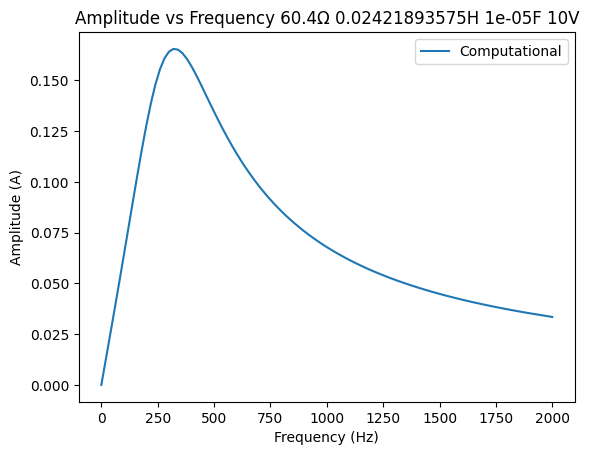

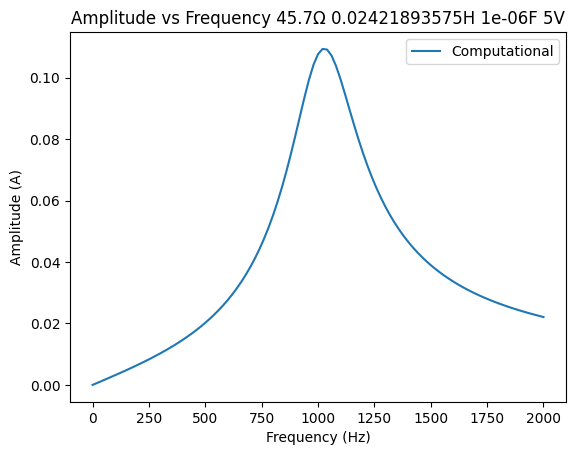

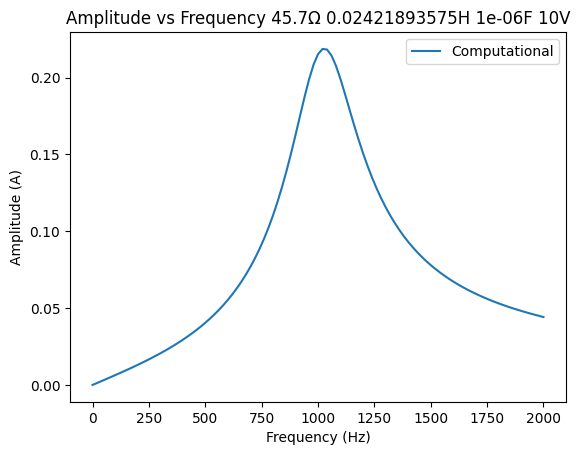

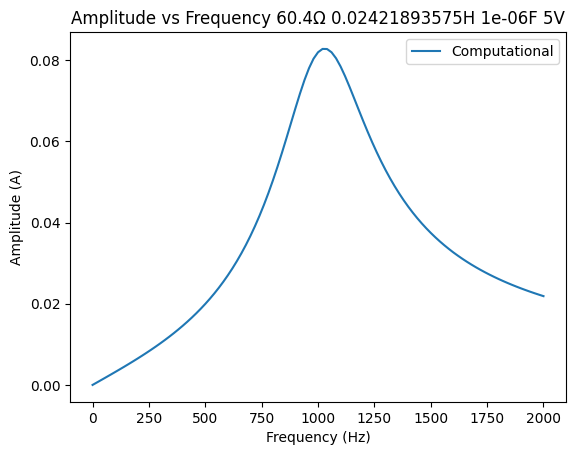

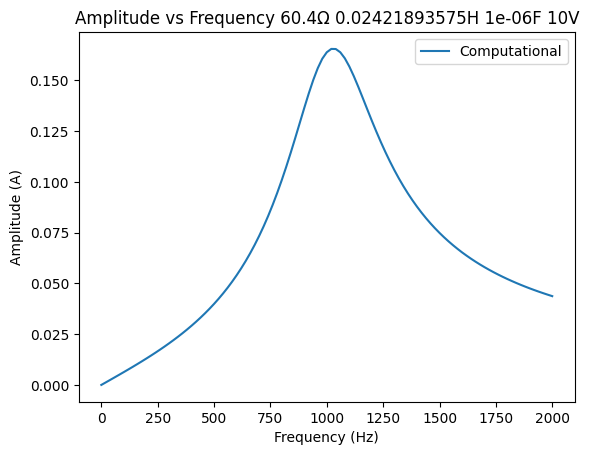

In [8]:
compute_models(resistance[0], inductance, capacitance[0], voltage[0])
compute_models(resistance[0], inductance, capacitance[0], voltage[1])
compute_models(resistance[1], inductance, capacitance[0], voltage[0])
compute_models(resistance[1], inductance, capacitance[0], voltage[1])
compute_models(resistance[0], inductance, capacitance[1], voltage[0])
compute_models(resistance[0], inductance, capacitance[1], voltage[1])
compute_models(resistance[1], inductance, capacitance[1], voltage[0])
compute_models(resistance[1], inductance, capacitance[1], voltage[1])